# Competição Externa - BigData

texto texto texto

## Bibliotecas que serão usadas

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

from matplotlib.cm import get_cmap

from pandas_profiling import ProfileReport

from sklearn import tree
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("ggplot")

## Fazendo merge dos dados das lojas atuais com a receita por mês

In [2]:
data_la = pd.read_csv("data/lojas_atuais.csv")

data_la

,cod_loja,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,FEATURE_05_VALUE_04,31,0.168922,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,5300108005004,5300108,NaN,FEATURE_02_VALUE_03,True,22.00,FEATURE_05_VALUE_03,27,0.215967,...,1562.674817,3.670883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3550308005052,3550308,NaN,FEATURE_02_VALUE_03,True,45.66,FEATURE_05_VALUE_03,6,0.190102,...,5593.905463,2.815883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,3145604003002,3145604,NaN,FEATURE_02_VALUE_04,False,30.00,FEATURE_05_VALUE_03,3,0.141988,...,12.824022,7.218132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1600303005010,1600303,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,62.49,FEATURE_05_VALUE_03,30,0.107619,...,325.531120,1.972944,FEATURE_11_VALUE_02,FEATURE_12_VALUE_01,100.0,88.1,100.0,100.0,88.5,93.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3125,3682,5105259003002,5105259,NaN,FEATURE_02_VALUE_04,False,30.16,FEATURE_05_VALUE_03,5,0.210289,...,36.397933,3.491315,NaN,NaN,100.0,91.7,100.0,100.0,97.1,97.6
3126,3683,2604106003003,2604106,FEATURE_01_VALUE_10,FEATURE_02_VALUE_02,False,38.00,FEATURE_05_VALUE_03,13,0.146264,...,163.567629,2.016780,NaN,NaN,100.0,85.0,100.0,100.0,50.7,72.5
3127,3685,4115804003002,4115804,NaN,FEATURE_02_VALUE_04,False,44.04,FEATURE_05_VALUE_02,7,0.226926,...,16.862438,4.455832,NaN,NaN,100.0,71.5,100.0,100.0,99.0,95.2
3128,3686,3509700003001,3509700,NaN,FEATURE_02_VALUE_06,False,31.76,FEATURE_05_VALUE_03,4,0.134354,...,20.565405,3.932982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_ru = pd.read_csv("data/data-rec-uni.csv")

data_ru

,cod_loja,mes,ano,receita,CATEG_01_REC_UNI_SUM,CATEG_02_REC_UNI_SUM,CATEG_03_REC_UNI_SUM,CATEG_04_REC_UNI_SUM,CATEG_05_REC_UNI_SUM,CATEG_06_REC_UNI_SUM,CATEG_07_REC_UNI_SUM,CATEG_08_REC_UNI_SUM,CATEG_09_REC_UNI_SUM,CATEG_10_REC_UNI_SUM,CATEG_11_REC_UNI_SUM,CATEG_12_REC_UNI_SUM,CATEG_13_REC_UNI_SUM,CATEG_14_REC_UNI_SUM,CATEG_15_REC_UNI_SUM,CATEG_16_REC_UNI_SUM
0,1,1,2016,441833.37,30.448040,18.710146,17.681055,20.887171,30.919290,31.706400,12.752683,45.436331,31.821209,33.360000,62.851924,11.310872,26.077014,20.426667,0.0,0.0
1,1,10,2016,611797.30,33.986803,25.142785,22.226022,28.956952,32.771997,42.858374,17.631987,41.811359,37.372261,38.705058,82.078196,16.034466,41.617166,0.000000,0.0,0.0
2,1,11,2016,876921.63,30.296667,22.965600,22.187400,27.690281,32.802101,40.951661,18.519352,74.652824,37.440439,39.748432,82.564317,17.904426,33.312410,18.900000,0.0,0.0
3,1,12,2016,1257613.00,33.188182,22.833700,22.379621,30.352067,33.086141,41.547036,19.352089,82.970158,41.299231,43.706934,87.137583,16.712837,37.271221,18.900000,0.0,0.0
4,1,2,2016,395340.22,43.719519,14.485492,21.231583,29.384186,30.219876,27.586336,16.231631,45.729259,27.168227,34.105365,72.724494,13.720239,25.093969,15.795000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,3687,5,2017,74631.46,29.506000,33.900000,31.543929,40.837500,38.821630,63.906923,22.284279,125.746000,36.458759,55.448387,104.748432,16.105217,54.150000,1.900000,0.0,0.0
73640,3687,6,2017,63204.15,26.000000,23.788889,27.902571,40.925000,34.527820,62.233333,25.615640,120.634615,34.966163,42.911236,105.431048,12.993281,53.900000,1.900000,0.0,0.0
73641,3687,7,2017,47865.16,16.712500,33.900000,27.392063,37.500000,32.751163,62.248333,22.848454,120.300000,27.363016,52.400000,106.550286,14.843529,44.400000,1.900000,0.0,0.0
73642,3687,8,2017,71171.48,30.089189,0.000000,34.258974,40.913158,36.561616,62.475714,22.554545,117.682692,40.785915,59.445455,105.446304,15.806667,62.900000,1.900000,0.0,0.0


In [4]:
data_merge = data_ru[["receita", "cod_loja", "ano", "mes"]].merge(data_la, left_on="cod_loja", right_on="cod_loja")

data_merge

,receita,cod_loja,ano,mes,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_09,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18
0,441833.37,1,2016,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,611797.30,1,2016,10,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,876921.63,1,2016,11,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1257613.00,1,2016,12,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,395340.22,1,2016,2,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,74631.46,3687,2017,5,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73640,63204.15,3687,2017,6,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73641,47865.16,3687,2017,7,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73642,71171.48,3687,2017,8,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_merge.to_csv("data/lojas-atuais-receita.csv", index = False)

### Fazendo um profile dos dados

In [6]:
profile = ProfileReport(data_merge, title="Pandas Profiling Report")

In [7]:
profile.to_file("report-2-1.html")

## Tratando os dados

### Criando a coluna `datetime`

Ela vai ajudar a organizar os dados por data de maneira mais fácil.

In [6]:
data_merge["datetime"] = pd.to_datetime(data_merge["ano"].astype(str) + "/" + data_merge["mes"].astype(str) + "/01", format = "%Y/%m/%d")

data_merge

,receita,cod_loja,ano,mes,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,datetime
0,441833.37,1,2016,1,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,611797.30,1,2016,10,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-01
2,876921.63,1,2016,11,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01
3,1257613.00,1,2016,12,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01
4,395340.22,1,2016,2,4125506005002,4125506,NaN,FEATURE_02_VALUE_04,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,74631.46,3687,2017,5,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-01
73640,63204.15,3687,2017,6,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-01
73641,47865.16,3687,2017,7,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-01
73642,71171.48,3687,2017,8,4211702001001,4211702,NaN,FEATURE_02_VALUE_04,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01


### Tratando atributos categoricos com STRING

In [32]:
data_tratada = data_merge.copy()

#### Tratando o atributo `FEATURE_02`

In [33]:
le_02 = preprocessing.LabelEncoder()

le_02.fit(data_tratada["feature_02"])

list(le_02.classes_)

['FEATURE_02_VALUE_02',
 'FEATURE_02_VALUE_03',
 'FEATURE_02_VALUE_04',
 'FEATURE_02_VALUE_06']

In [34]:
data_tratada["feature_02"] = le_02.transform(data_tratada['feature_02']) 

#### Tratando o atributo `FEATURE_05`

In [35]:
le_05 = preprocessing.LabelEncoder()

le_05.fit(data_tratada["feature_05"])

list(le_05.classes_)

['FEATURE_05_VALUE_01',
 'FEATURE_05_VALUE_02',
 'FEATURE_05_VALUE_03',
 'FEATURE_05_VALUE_04',
 'FEATURE_05_VALUE_05',
 'FEATURE_05_VALUE_06',
 'FEATURE_05_VALUE_07',
 'FEATURE_05_VALUE_08']

In [36]:
data_tratada["feature_05"] = le_05.transform(data_tratada['feature_05']) 

In [37]:
data_tratada

,receita,cod_loja,ano,mes,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,datetime
0,441833.37,1,2016,1,4125506005002,4125506,NaN,2,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01
1,611797.30,1,2016,10,4125506005002,4125506,NaN,2,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-01
2,876921.63,1,2016,11,4125506005002,4125506,NaN,2,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01
3,1257613.00,1,2016,12,4125506005002,4125506,NaN,2,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01
4,395340.22,1,2016,2,4125506005002,4125506,NaN,2,True,21.76,...,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,74631.46,3687,2017,5,4211702001001,4211702,NaN,2,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-01
73640,63204.15,3687,2017,6,4211702001001,4211702,NaN,2,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-01
73641,47865.16,3687,2017,7,4211702001001,4211702,NaN,2,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-01
73642,71171.48,3687,2017,8,4211702001001,4211702,NaN,2,False,26.50,...,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01


## Adicionando mais informações

### Contagem de feriados nacionais

In [38]:
data_feriados_nacionais = pd.read_csv("data/meses-com-feriado-nacional.csv")

data_feriados_nacionais

,ano,mes,contagem
0,2016,11,2
1,2016,1,1
2,2016,3,1
3,2016,4,1
4,2016,5,1
5,2016,9,1
6,2016,10,1
7,2016,12,1
8,2017,4,2
9,2017,11,2


In [39]:
data_tratada = pd.merge(data_tratada, data_feriados_nacionais, left_on = ["mes", "ano"], right_on = ["mes", "ano"], how = "left")

data_tratada

,receita,cod_loja,ano,mes,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,datetime,contagem
0,441833.37,1,2016,1,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01,1.0
1,611797.30,1,2016,10,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-01,1.0
2,876921.63,1,2016,11,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01,2.0
3,1257613.00,1,2016,12,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01,1.0
4,395340.22,1,2016,2,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,74631.46,3687,2017,5,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-01,1.0
73640,63204.15,3687,2017,6,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-01,NaN
73641,47865.16,3687,2017,7,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-01,NaN
73642,71171.48,3687,2017,8,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01,NaN


In [40]:
data_tratada["contagem"] = data_tratada["contagem"].fillna(0)

data_tratada

,receita,cod_loja,ano,mes,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,datetime,contagem
0,441833.37,1,2016,1,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-01-01,1.0
1,611797.30,1,2016,10,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-10-01,1.0
2,876921.63,1,2016,11,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-01,2.0
3,1257613.00,1,2016,12,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01,1.0
4,395340.22,1,2016,2,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,74631.46,3687,2017,5,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-01,1.0
73640,63204.15,3687,2017,6,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-06-01,0.0
73641,47865.16,3687,2017,7,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-07-01,0.0
73642,71171.48,3687,2017,8,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-08-01,0.0


### Adicionando o UF do estado

In [41]:
data_uf = pd.read_csv("data/municipios-uf.csv")

data_uf

,Nome_UF,Código Município Completo,Nome_Município,UF_COD
0,Rondônia,1100015,Alta Floresta D'Oeste,21
1,Rondônia,1100379,Alto Alegre dos Parecis,21
2,Rondônia,1100403,Alto Paraíso,21
3,Rondônia,1100346,Alvorada D'Oeste,21
4,Rondônia,1100023,Ariquemes,21
...,...,...,...,...
5565,Goiás,5222005,Vianópolis,8
5566,Goiás,5222054,Vicentinópolis,8
5567,Goiás,5222203,Vila Boa,8
5568,Goiás,5222302,Vila Propício,8


In [42]:
data_tratada = pd.merge(data_tratada, data_uf, left_on = "cod_municipio", right_on = "Código Município Completo", how = "left")
data_tratada = data_tratada.drop("Código Município Completo", axis = 1)

data_tratada

,receita,cod_loja,ano,mes,cod_ap,cod_municipio,feature_01,feature_02,feature_03,feature_04,...,feature_14,feature_15,feature_16,feature_17,feature_18,datetime,contagem,Nome_UF,Nome_Município,UF_COD
0,441833.37,1,2016,1,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,2016-01-01,1.0,Paraná,São José dos Pinhais,13.0
1,611797.30,1,2016,10,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,2016-10-01,1.0,Paraná,São José dos Pinhais,13.0
2,876921.63,1,2016,11,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,2016-11-01,2.0,Paraná,São José dos Pinhais,13.0
3,1257613.00,1,2016,12,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,2016-12-01,1.0,Paraná,São José dos Pinhais,13.0
4,395340.22,1,2016,2,4125506005002,4125506,NaN,2,True,21.76,...,NaN,NaN,NaN,NaN,NaN,2016-02-01,0.0,Paraná,São José dos Pinhais,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,74631.46,3687,2017,5,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,2017-05-01,1.0,Santa Catarina,Orleans,23.0
73640,63204.15,3687,2017,6,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,2017-06-01,0.0,Santa Catarina,Orleans,23.0
73641,47865.16,3687,2017,7,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,2017-07-01,0.0,Santa Catarina,Orleans,23.0
73642,71171.48,3687,2017,8,4211702001001,4211702,NaN,2,False,26.50,...,NaN,NaN,NaN,NaN,NaN,2017-08-01,0.0,Santa Catarina,Orleans,23.0


In [50]:
data_tratada.isnull().sum()

receita               0
cod_loja              0
ano                   0
mes                   0
cod_ap                0
cod_municipio         0
feature_01        46672
feature_02            0
feature_03            0
feature_04            0
feature_05            0
feature_06            0
feature_07            0
feature_08            0
feature_09            0
feature_10            0
feature_11        67795
feature_12        67795
feature_13        52695
feature_14        52695
feature_15        52695
feature_16        52695
feature_17        52695
feature_18        52695
datetime              0
contagem              0
Nome_UF            3535
Nome_Município     3535
UF_COD             3535
dtype: int64

In [56]:
data_tratada["UF_COD"] = data_tratada["UF_COD"].fillna(-1)

## Fazendo teste com modelo

In [76]:
atributos_selecionados = ["datetime", "receita", "feature_02", "feature_03", "feature_04", "feature_05", "feature_06", 'feature_07', "feature_09", "feature_10", "feature_13", "feature_14", "feature_15", "feature_16", "feature_17", "feature_18", "contagem", "UF_COD"]
atributos_treino = atributos_selecionados.copy()
atributos_treino.remove("receita")
atributos_treino.remove("datetime")

model_data = data_tratada.loc[:, atributos_selecionados]

model_data["month"] = model_data["datetime"].dt.month
model_data["quarter"] = model_data["datetime"].dt.quarter
model_data["year"] = model_data["datetime"].dt.year

model_data


,datetime,receita,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_09,feature_10,...,feature_14,feature_15,feature_16,feature_17,feature_18,contagem,UF_COD,month,quarter,year
0,2016-01-01,441833.37,2,True,21.76,3,31,0.168922,115.958848,2.349821,...,NaN,NaN,NaN,NaN,NaN,1.0,13.0,1,1,2016
1,2016-10-01,611797.30,2,True,21.76,3,31,0.168922,115.958848,2.349821,...,NaN,NaN,NaN,NaN,NaN,1.0,13.0,10,4,2016
2,2016-11-01,876921.63,2,True,21.76,3,31,0.168922,115.958848,2.349821,...,NaN,NaN,NaN,NaN,NaN,2.0,13.0,11,4,2016
3,2016-12-01,1257613.00,2,True,21.76,3,31,0.168922,115.958848,2.349821,...,NaN,NaN,NaN,NaN,NaN,1.0,13.0,12,4,2016
4,2016-02-01,395340.22,2,True,21.76,3,31,0.168922,115.958848,2.349821,...,NaN,NaN,NaN,NaN,NaN,0.0,13.0,2,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,2017-05-01,74631.46,2,False,26.50,2,2,0.199854,7.701540,4.454541,...,NaN,NaN,NaN,NaN,NaN,1.0,23.0,5,2,2017
73640,2017-06-01,63204.15,2,False,26.50,2,2,0.199854,7.701540,4.454541,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,6,2,2017
73641,2017-07-01,47865.16,2,False,26.50,2,2,0.199854,7.701540,4.454541,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,7,3,2017
73642,2017-08-01,71171.48,2,False,26.50,2,2,0.199854,7.701540,4.454541,...,NaN,NaN,NaN,NaN,NaN,0.0,23.0,8,3,2017


### Faz impute nos valores faltantes

In [77]:
model_data_x = model_data.drop(["receita", "datetime"], axis = 1)

model_data_x

,feature_02,feature_03,feature_04,feature_05,feature_06,feature_07,feature_09,feature_10,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,contagem,UF_COD,month,quarter,year
0,2,True,21.76,3,31,0.168922,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.0,1,1,2016
1,2,True,21.76,3,31,0.168922,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.0,10,4,2016
2,2,True,21.76,3,31,0.168922,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,2.0,13.0,11,4,2016
3,2,True,21.76,3,31,0.168922,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,1.0,13.0,12,4,2016
4,2,True,21.76,3,31,0.168922,115.958848,2.349821,NaN,NaN,NaN,NaN,NaN,NaN,0.0,13.0,2,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,2,False,26.50,2,2,0.199854,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,1.0,23.0,5,2,2017
73640,2,False,26.50,2,2,0.199854,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.0,6,2,2017
73641,2,False,26.50,2,2,0.199854,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.0,7,3,2017
73642,2,False,26.50,2,2,0.199854,7.701540,4.454541,NaN,NaN,NaN,NaN,NaN,NaN,0.0,23.0,8,3,2017


In [78]:
imputer = KNNImputer(n_neighbors = 5)

imputer.fit_transform(model_data_x)

KeyboardInterrupt: 

### Separa o conjunto de treino e teste

In [59]:
train_df = model_data[~model_data["datetime"].isin([date(2017,10,1), date(2017,11,1), date(2017,12,1)])]
test_df = model_data[model_data["datetime"].isin([date(2017,10,1), date(2017,11,1), date(2017,12,1)])]

In [60]:
X_train = train_df[atributos_treino + ["month", "quarter", "year"]]
y_train = train_df["receita"]

X_test = test_df[atributos_treino + ["month", "quarter", "year"]]
y_test = test_df["receita"]

In [61]:
rf = RandomForestRegressor(n_estimators = 200)
rf.fit(X_train.values, y_train.values)

RandomForestRegressor(n_estimators=200)

In [62]:
y_pred = rf.predict(X_test)

m = np.sqrt(mean_squared_error(y_test, y_pred))
r = r2_score(y_test, y_pred)

m, r

(36770.91318395953, 0.948048640437788)

In [63]:
rf.feature_importances_

array([0.01183235, 0.00380674, 0.20224396, 0.03589933, 0.41238088,
       0.03359691, 0.06955468, 0.03679355, 0.00519733, 0.02497656,
       0.1540629 , 0.00455031, 0.00510449])

In [64]:
X_train.columns

Index(['feature_02', 'feature_03', 'feature_04', 'feature_05', 'feature_06',
       'feature_07', 'feature_09', 'feature_10', 'contagem', 'UF_COD', 'month',
       'quarter', 'year'],
      dtype='object')

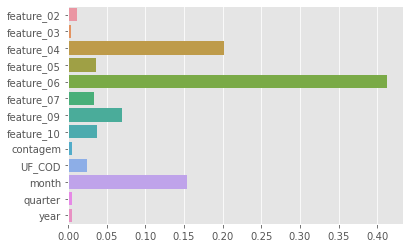

In [65]:
sns.barplot(x = rf.feature_importances_, y = X_train.columns, orient = "h")
plt.show()

In [23]:
i_tree = 0
for tree_in_forest in rf.estimators_:
    print(i_tree)

    export_graphviz(tree_in_forest, 'treedot/tree_' + str(i_tree) +'.dot', feature_names = list(X_train.columns), max_depth = 10)
    
    i_tree = i_tree + 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


KeyboardInterrupt: 

In [24]:
i_tree = 0
for tree_in_forest in rf.estimators_:
    print(i_tree)

    with open("trees/tree_" + str(i_tree) + ".txt", "w") as f:
        f.writelines(tree.export_text(tree_in_forest, feature_names = list(X_train.columns), max_depth = 100))
    
    i_tree = i_tree + 1

0
1
2
3


KeyboardInterrupt: 